In [1]:
import pandas as pd 
import seaborn as sns

import nltk
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
sns.set()
pd.set_option('display.max_colwidth', None)

## Parsing

In [3]:
allposts = pd.read_json("bluesky-data.json")
allposts

,author,date,text,replies,reposts,tags
0,PKPs Powerfromspace1 🚀 Twitter ‘X’ refugee thank you 'Elmo' 🙄,2025-03-25T05:52:39.513Z,"JD Vance, Pete Hegseth and probably all the other members of the Trump administration LOATHE Europe. This is evident from their private and public messages. They are no longer our allies, and we can't rely on them.\n\nIt's time to be European and buy European.\n\n#ukraine #russia\n\nx.com/p_kallioniem...",9,46,"[ukraine, russia]"
1,Eugene McParland 🇺🇦,2025-03-26T07:13:26.680Z,"On the night of March 26, 2025, 117 Shahed-type attack UAVs and imitation drones were launched from various directions.\n \n#Ukraine forces repelled the attack, downing 56 UAVs and 48 imitation drones were lost in the area\n\nThe attack affected Sumy, Dnipro, Kirovohrad, and Cherkasy regions.",1,6,[ukraine]
2,Team HERMES,2025-03-24T04:08:19.012Z,If #Russia and the #Serbian government are Mordor... then that means #Ukraine is Rivendell. But it also means that #Serbian opposition... is Gondor and Rohan. And that tracks perfectly.,3,6,"[russia, serbian, ukraine, serbian]"
3,Anders Puck Nielsen,2025-03-24T08:08:41.403Z,I joined @united24media.com for a status on the war and a discussion of what victory for #Ukraine looks like. I think it was a really good conversation. You can listen to it here.,8,71,[ukraine]
4,Cheryl8990,2025-03-25T11:14:52.085Z,"“And what she is doing with #Ukraine shows that it goes beyond her maybe misunderstanding one conflict. She is, hook, line and sinker, a Russian puppet.” #TulsiGabbard \n\nwww.independent.co.uk/news/world/a...",3,16,"[ukraine, tulsigabbard]"
...,...,...,...,...,...,...
2995,AK,2025-02-20T15:07:45.917Z,"On the #dataviz front, I’ve been thinking today about how to convey the foreign policy danger presented by US abandonment of #ukraine, appeasement of Putin, and abdication of leadership. These concepts are hard to understand for a huge portion of Americans.",0,0,"[dataviz, ukraine]"
2996,Kastero,2025-01-02T13:18:13.440Z,"The Russian ability might change rapidly.\n#Ukraine ought to work on developing a surface leveled or partly sub-sea model, that is only visible when it´s actually in a firing position. With the same speed and accuracy.",2,0,[ukraine]
2997,Kastero,2025-01-02T13:13:40.346Z,"The Russian ability might change rapidly.\n#Ukraine ought to work on developing a surface leveled or partly sub-sea model, that is only visible when it´s actually in a firing position. With the same speed and accuracy.",0,0,[ukraine]
2998,Scott Lucas,2024-11-10T07:32:43.113Z,"On air soon w BBC 5 Live to evaluate #Trump's threat to US, Europe, and the world --- including #Ukraine as he supports #Russia's #Putin \n\nwww.bbc.co.uk/sounds/play/...",0,0,"[trump's, ukraine, russia's, putin]"


### Stop word removal
Stop word removal should be done and the analysis that follows may be run on either the stopword included text or the stop word excluded text as one is more correct for getting optimal scores and one is using the prior steps which I wanted the students to get experience with.

In [5]:
stopwordset = set(stopwords.words('english'))
def sw_remove(sent):
    words = nltk.word_tokenize(sent)
    words_out = []
    for word in words:
        word = word.lower()
        if word not in stopwordset and len(word) > 1 and word != "rt":
            #last 2 clauses are optional but remove some gibberish to VADER
            words_out += [word]
    return " ".join(words_out)


allposts["nostop"] = [sw_remove(t) for t in allposts["text"]]
allposts.head()

,author,date,text,replies,reposts,tags,nostop
0,PKPs Powerfromspace1 🚀 Twitter ‘X’ refugee thank you 'Elmo' 🙄,2025-03-25T05:52:39.513Z,"JD Vance, Pete Hegseth and probably all the other members of the Trump administration LOATHE Europe. This is evident from their private and public messages. They are no longer our allies, and we can't rely on them.\n\nIt's time to be European and buy European.\n\n#ukraine #russia\n\nx.com/p_kallioniem...",9,46,"[ukraine, russia]",jd vance pete hegseth probably members trump administration loathe europe evident private public messages longer allies ca n't rely 's time european buy european ukraine russia x.com/p_kallioniem ...
1,Eugene McParland 🇺🇦,2025-03-26T07:13:26.680Z,"On the night of March 26, 2025, 117 Shahed-type attack UAVs and imitation drones were launched from various directions.\n \n#Ukraine forces repelled the attack, downing 56 UAVs and 48 imitation drones were lost in the area\n\nThe attack affected Sumy, Dnipro, Kirovohrad, and Cherkasy regions.",1,6,[ukraine],night march 26 2025 117 shahed-type attack uavs imitation drones launched various directions ukraine forces repelled attack downing 56 uavs 48 imitation drones lost area attack affected sumy dnipro kirovohrad cherkasy regions
2,Team HERMES,2025-03-24T04:08:19.012Z,If #Russia and the #Serbian government are Mordor... then that means #Ukraine is Rivendell. But it also means that #Serbian opposition... is Gondor and Rohan. And that tracks perfectly.,3,6,"[russia, serbian, ukraine, serbian]",russia serbian government mordor ... means ukraine rivendell also means serbian opposition ... gondor rohan tracks perfectly
3,Anders Puck Nielsen,2025-03-24T08:08:41.403Z,I joined @united24media.com for a status on the war and a discussion of what victory for #Ukraine looks like. I think it was a really good conversation. You can listen to it here.,8,71,[ukraine],joined united24media.com status war discussion victory ukraine looks like think really good conversation listen
4,Cheryl8990,2025-03-25T11:14:52.085Z,"“And what she is doing with #Ukraine shows that it goes beyond her maybe misunderstanding one conflict. She is, hook, line and sinker, a Russian puppet.” #TulsiGabbard \n\nwww.independent.co.uk/news/world/a...",3,16,"[ukraine, tulsigabbard]",ukraine shows goes beyond maybe misunderstanding one conflict hook line sinker russian puppet. tulsigabbard www.independent.co.uk/news/world/a ...


In [6]:
sid = SentimentIntensityAnalyzer()
df_scores = pd.json_normalize(allposts.text.apply(sid.polarity_scores))
allscores = pd.merge(allposts, df_scores, left_index=True, right_index=True)
allscores

,author,date,text,replies,reposts,tags,nostop,neg,neu,pos,compound
0,PKPs Powerfromspace1 🚀 Twitter ‘X’ refugee thank you 'Elmo' 🙄,2025-03-25T05:52:39.513Z,"JD Vance, Pete Hegseth and probably all the other members of the Trump administration LOATHE Europe. This is evident from their private and public messages. They are no longer our allies, and we can't rely on them.\n\nIt's time to be European and buy European.\n\n#ukraine #russia\n\nx.com/p_kallioniem...",9,46,"[ukraine, russia]",jd vance pete hegseth probably members trump administration loathe europe evident private public messages longer allies ca n't rely 's time european buy european ukraine russia x.com/p_kallioniem ...,0.118,0.882,0.000,-0.7297
1,Eugene McParland 🇺🇦,2025-03-26T07:13:26.680Z,"On the night of March 26, 2025, 117 Shahed-type attack UAVs and imitation drones were launched from various directions.\n \n#Ukraine forces repelled the attack, downing 56 UAVs and 48 imitation drones were lost in the area\n\nThe attack affected Sumy, Dnipro, Kirovohrad, and Cherkasy regions.",1,6,[ukraine],night march 26 2025 117 shahed-type attack uavs imitation drones launched various directions ukraine forces repelled attack downing 56 uavs 48 imitation drones lost area attack affected sumy dnipro kirovohrad cherkasy regions,0.246,0.726,0.028,-0.8934
2,Team HERMES,2025-03-24T04:08:19.012Z,If #Russia and the #Serbian government are Mordor... then that means #Ukraine is Rivendell. But it also means that #Serbian opposition... is Gondor and Rohan. And that tracks perfectly.,3,6,"[russia, serbian, ukraine, serbian]",russia serbian government mordor ... means ukraine rivendell also means serbian opposition ... gondor rohan tracks perfectly,0.000,0.828,0.172,0.7783
3,Anders Puck Nielsen,2025-03-24T08:08:41.403Z,I joined @united24media.com for a status on the war and a discussion of what victory for #Ukraine looks like. I think it was a really good conversation. You can listen to it here.,8,71,[ukraine],joined united24media.com status war discussion victory ukraine looks like think really good conversation listen,0.113,0.723,0.165,0.2006
4,Cheryl8990,2025-03-25T11:14:52.085Z,"“And what she is doing with #Ukraine shows that it goes beyond her maybe misunderstanding one conflict. She is, hook, line and sinker, a Russian puppet.” #TulsiGabbard \n\nwww.independent.co.uk/news/world/a...",3,16,"[ukraine, tulsigabbard]",ukraine shows goes beyond maybe misunderstanding one conflict hook line sinker russian puppet. tulsigabbard www.independent.co.uk/news/world/a ...,0.169,0.831,0.000,-0.6249
...,...,...,...,...,...,...,...,...,...,...,...
2995,AK,2025-02-20T15:07:45.917Z,"On the #dataviz front, I’ve been thinking today about how to convey the foreign policy danger presented by US abandonment of #ukraine, appeasement of Putin, and abdication of leadership. These concepts are hard to understand for a huge portion of Americans.",0,0,"[dataviz, ukraine]",dataviz front thinking today convey foreign policy danger presented us abandonment ukraine appeasement putin abdication leadership concepts hard understand huge portion americans,0.176,0.774,0.049,-0.7096
2996,Kastero,2025-01-02T13:18:13.440Z,"The Russian ability might change rapidly.\n#Ukraine ought to work on developing a surface leveled or partly sub-sea model, that is only visible when it´s actually in a firing position. With the same speed and accuracy.",2,0,[ukraine],russian ability might change rapidly ukraine ought work developing surface leveled partly sub-sea model visible it´s actually firing position speed accuracy,0.065,0.872,0.063,-0.0258
2997,Kastero,2025-01-02T13:13:40.346Z,"The Russian ability might change rapidly.\n#Ukraine ought to work on developing a surface leveled or partly sub-sea model, that is only visible when it´s actually in a firing position. With the same speed and accuracy.",0,0,[ukraine],russian ability might change rapidly ukraine ought work developing surface leveled partly sub-sea model visible it´s actually 

In [7]:
allscores.sort_values("pos").tail()[["text", "pos"]][::-1]

,text,pos
2472,Be brave like Ukraine! #Ukraine #Trump,0.608
1850,Welcome to #StunDay friends! I'm sharing this beautiful blue poppy in support of #Ukraine\nMuch love xx\n•\n#Nature 🌿 #photography #PhotographersOfBluesky #EastCoastKin #PhotographersUnited #BloomScrolling,0.549
2966,#UKRAINE \nDonate and Supporting UKRAINIAN FREEDOM FIGHTERS !!!!!!!!!!!!!!!!!!!!!!!\nwww.help99.co/patches/spec...,0.532
661,Let’s welcome \n@pa-ulander.bsky.social to the Fellaship \nThanks for supporting and great forge @kypainter.bsky.social \n\n#NAFO #Fellas #Ukraine,0.518
1176,"Read and share, please. #UkrainianView #Ukraine\n\nwww.justice.gov/archives/opa...",0.474


In [8]:
allscores.sort_values("neg").tail()[["text", "neg"]][::-1]

,text,neg
1182,Death and destruction in #Ukraine after #Trump betrayal \n\nopen.substack.com/pub/thebulwa...,0.655
2376,Another bended knee for a coward and bully. Tragic. #ukraine,0.605
11,"Death to war criminals and terrorists, and those who whitewash them. Death to those who enable them.\n\n#Ukraine",0.598
1075,"#Ukraine will stop the war immediately if #Russia stops attacking Ukraine.\n\nWho doesn't want peace, comrade #Krasnov?",0.573
2497,Words fail me. #ukraine,0.538


In [9]:
allscores.sort_values("neu").tail()[["text", "neu"]][::-1]

,text,neu
971,"There is only one traitor of democracy here and his surname doesn't start with K. - #Musk calls Sen. Kelly a 'traitor' over trip to #Ukraine, Kelly hits back\nabcnews.go.com/Politics/mus... #Russia #Putinswar",1.0
342,"‼️‼️‼️\n\nEurope must be at the negotiating table, Zelensky said after the end of the conversation between Trump and Putin, — Sky News\n\n#Zelenskyy #Ukraine",1.0
2783,@DemocracyMattersALot\n\nHe cannot be counted on in the slightest to stand up and do the right thing. His word means nothing.\n\n#Ukraine #Russia #MikeLawler #NewYork #GOPHouse #WeSaidChooseMondaireJones #USPol,1.0
2784,#Palestine #Ukraine #resistlib #liberalism #leftism #votebluenomatterwho,1.0
354,Pete Songi on Donald Trump and Vladimir Putin’s phone call – cartoon #Ukraine,1.0


#### Here is the alternative with analysis done on stop words removed:

In [11]:
sid = SentimentIntensityAnalyzer()
df_scores = pd.json_normalize(allposts.nostop.apply(sid.polarity_scores))
allscores2 = pd.merge(allposts, df_scores, left_index=True, right_index=True)
allscores2.sort_values("pos").tail()[["text", "pos"]][::-1]


,text,pos
2579,#Peace and #Freedom for #Ukraine 🇺🇦🕊️,0.794
1626,Peace is more than a symbol. It’s a commitment. 🕊️💙💛\n\n#Ukraine #Peace #HumanRights,0.706
2739,#Ukraine Zelenskyy should be on the cover of Time and Honored as a true hero and leader! #resistrump #resistfascism #freedom,0.673
2472,Be brave like Ukraine! #Ukraine #Trump,0.663
1777,The hand shake and hug that brings #hope. \n#Ukraine #Canada,0.662


In [12]:
allscores2.sort_values("neg").tail()[["text", "neg"]][::-1]

,text,neg
11,"Death to war criminals and terrorists, and those who whitewash them. Death to those who enable them.\n\n#Ukraine",0.863
1182,Death and destruction in #Ukraine after #Trump betrayal \n\nopen.substack.com/pub/thebulwa...,0.740
2376,Another bended knee for a coward and bully. Tragic. #ukraine,0.697
1075,"#Ukraine will stop the war immediately if #Russia stops attacking Ukraine.\n\nWho doesn't want peace, comrade #Krasnov?",0.678
1867,‘Trump doesn’t understand who the aggressor is’: fatigue and anger in Odesa #Ukraine,0.652


In [13]:
allscores.sort_values("neu").tail()[["text", "neu"]][::-1]

,text,neu
971,"There is only one traitor of democracy here and his surname doesn't start with K. - #Musk calls Sen. Kelly a 'traitor' over trip to #Ukraine, Kelly hits back\nabcnews.go.com/Politics/mus... #Russia #Putinswar",1.0
342,"‼️‼️‼️\n\nEurope must be at the negotiating table, Zelensky said after the end of the conversation between Trump and Putin, — Sky News\n\n#Zelenskyy #Ukraine",1.0
2783,@DemocracyMattersALot\n\nHe cannot be counted on in the slightest to stand up and do the right thing. His word means nothing.\n\n#Ukraine #Russia #MikeLawler #NewYork #GOPHouse #WeSaidChooseMondaireJones #USPol,1.0
2784,#Palestine #Ukraine #resistlib #liberalism #leftism #votebluenomatterwho,1.0
354,Pete Songi on Donald Trump and Vladimir Putin’s phone call – cartoon #Ukraine,1.0


## Some given code
and tested here, graph not explicitly asked for

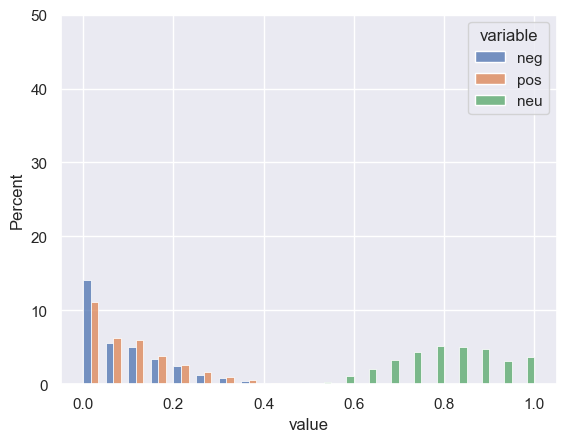

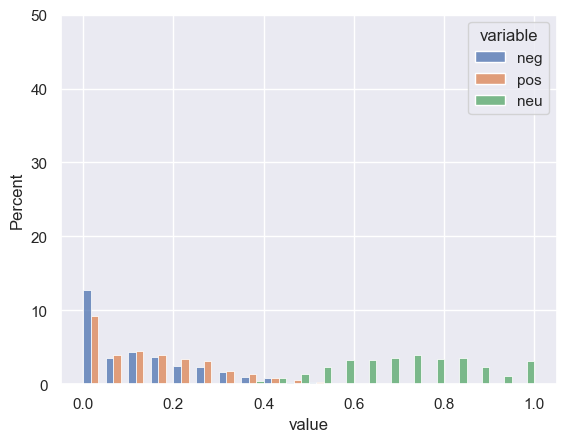

In [15]:
def plot_scores(scores):
    ax = sns.histplot(scores.melt(value_vars=["neg", "pos", "neu"]), x="value", hue="variable", 
                        multiple="dodge", stat="percent", common_bins=True, common_norm=True, bins=20)
    ax.set_ylim(0, 50)
    return ax
plot_scores(allscores)
plt.show()
plot_scores(allscores2)
plt.show()

In [16]:
def get_posts_with_tag(posts, tag):
    return posts.loc[posts.tags.apply(lambda x: tag in x)]

def get_all_tags(posts):
    return posts.tags.explode().unique()

In [17]:
tags = list(get_all_tags(allscores))
tags[:5]

['ukraine', 'russia', 'serbian', 'tulsigabbard', 'f*cktrump']

In [18]:
# generate a dictionary, where tag -> a dataframe with tweets in just that tag
tag_subsets = {
    t: get_posts_with_tag(allscores, t) 
    for t in tags
}

#Sort by length of dataframe format of list: [(tag, df), ....]
tag_counts = sorted(tag_subsets.items(), key=lambda x: len(x[1]))[::-1]
# turn sorted list into [(tag, count, df), ...]
tag_counts = [(k, len(subset), subset) for k, subset in tag_counts]

TAG: trump 447


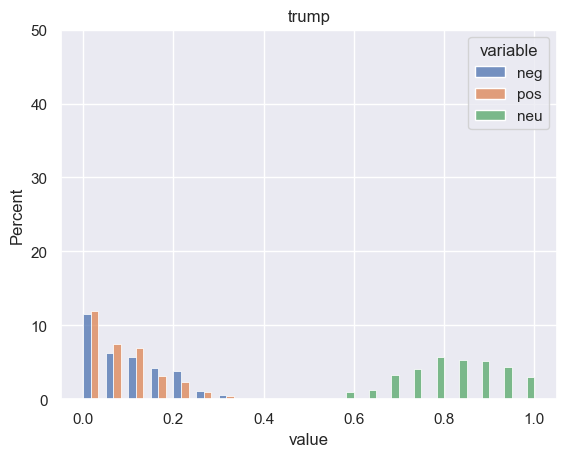

TAG: russia 426


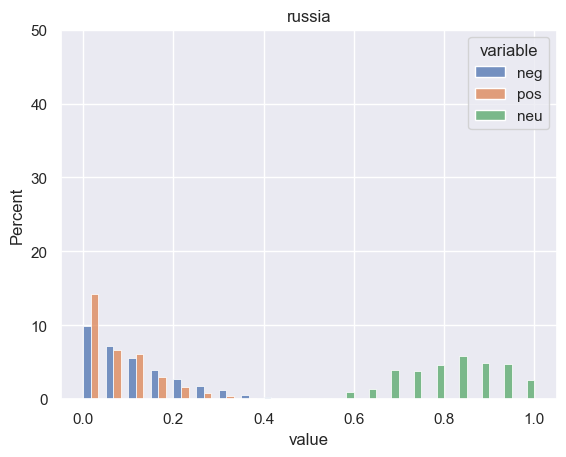

TAG: zelenskyy 203


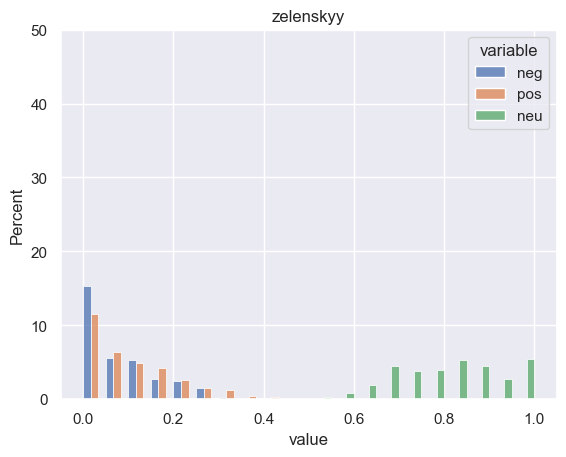

TAG: putin 181


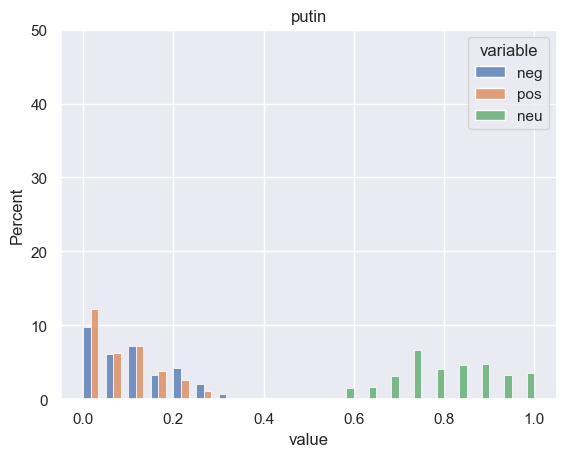

TAG: zelensky 169


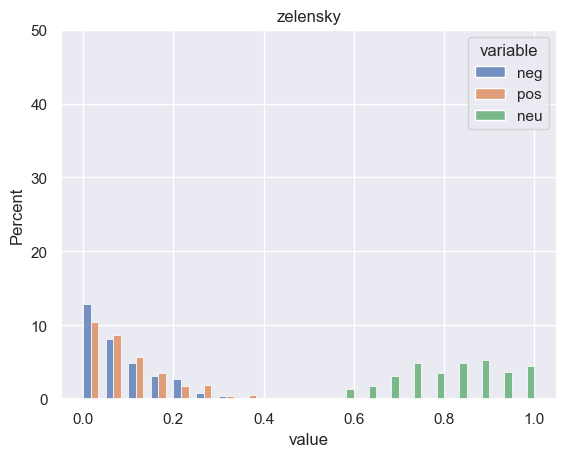

In [19]:
# Start with 2nd through 6th most common hashtags because most common will be ukraine

for tag, cnt, subset in tag_counts[1:6]:
    print(f"TAG: {tag} {cnt}")
    ax = plot_scores(subset)
    ax.set_title(tag)
    plt.show()

## Compound Scores
This was not used in 2025

In [21]:
#def plot_compound(scores):
#    ax = sns.histplot(scores.melt(value_vars=["compound"]), x="value", hue="variable", 
#                        multiple="dodge", stat="percent", common_bins=True, common_norm=True, bins=20)
#    ax.set_ylim(0, 50)
#    return ax
#
# Start with 2nd through 6th most common hashtags because most common will be ukraine
#
#for tag, cnt, subset in tag_counts[1:6]:
#    print(f"TAG: {tag} {cnt}")
#    ax = plot_compound(subset)
#    ax.set_title(tag)
#    plt.show()

## Neutral score > pos or neg

In [23]:
allscores["negdiff"] = allscores.neg - allscores.neu
allscores["posdiff"] = allscores.pos - allscores.neu

allscores.sort_values("posdiff").head()[["text", "pos", "neu"]]

,text,pos,neu
1996,In Vancouver #trump #canada #ukraine #transrights,0.0,1.0
2319,Pause and breathe it’s the only way to manage the long game. \n\n#chaos #ukraine,0.0,1.0
2340,#ukraine,0.0,1.0
2345,Starmer should ask him to sign a rare earths deal with the UK \n\nWe can make batteries together and call them UKUK's \n\n🤔\n\n#ukraine\n#starmer\n#electronics,0.0,1.0
2348,33 times \n\n#ukraine #zelenskyy #slavaukraini,0.0,1.0


In [24]:
allscores.sort_values("negdiff").head()[["text", "neg", "neu"]]

,text,neg,neu
2397,Mind-boggling. Imagine FDR extorting and yelling at Churchill and taking Hitler’s side. \n\n#Ukraine #Zelinskyy,0.0,1.0
976,For context ⬇️\n\n#NAFO #Ukraine #EU #Poland #Starlink #ElonMusk #Putin #propaganda #appeasement,0.0,1.0
472,Velykden` and spring flowers ornament\n#beads #boho #ukraine #ornaments #handmade #colorscheme #beadwork #diy #pixelart #pattern #art,0.0,1.0
2454,"“Roberta Bondar”\nBred by Joyce L. Fleming, Canada, 1987.\nNamed after Canada's first female astronaut.\n\nen.wikipedia.org/wiki/Roberta...\nwww.helpmefind.com/rose/l.php?l...\n\n#nature #photography #roses #rose #resist #standwithukraine #ukraine #rosa #roos\n#バラ#장미 #троянда #zelensky #slavaukraini",0.0,1.0
1619,Sometimes history both instructs and repeats. @timothysnyder.bsky.social #ukraine,0.0,1.0
